# 데이터 전처리

In [25]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
import pandas as pd
import numpy as np

In [3]:
# group2_1819 = pd.read_csv("data/final_group2/group2_1819.csv")
# g2_18 = pd.read_csv("data/final_group2/g2_18.csv").drop("Unnamed: 0", axis = 1)
# g2_19 = pd.read_csv("data/final_group2/g2_19.csv").drop("Unnamed: 0", axis = 1)
업무주거 = pd.read_csv("data/final_group2/업무주거.csv").drop("Unnamed: 0", axis = 1)

In [4]:
업무주거['사용일자'] = pd.to_datetime(업무주거['사용일자']).dt.normalize()

In [5]:
업무주거 = 업무주거.reset_index().drop("index", axis = 1)

In [6]:
# 서울외의 지역에 포함된 역은 모두 삭제하기
# 서울외의 지역은 버정데이터가 없어서 다 0으로 뜸 따라서 아래의 코드로 해결가능!

업무주거 = 업무주거[업무주거.버스정류장 != 0].reset_index().drop("index", axis = 1)

In [7]:
# 일강수량 na값 0으로 대체 (na값은 그날 강수가 0의미)

업무주거.일강수량 = 업무주거.일강수량.fillna(0)

# 파생변수 다루기

In [8]:
date_table = 업무주거.pivot_table(index = ['사용일자', '휴일여부', 'date'], values='총승객수', aggfunc='sum')
date_table = date_table.reset_index()

In [9]:
#누적 휴일 변수 만들어주기
holiday_count = [0] * date_table.shape[0]
holiday = date_table['휴일여부']

n = 1

for i in range(date_table.shape[0]):
    if holiday[i] == 'Y':
        holiday_count[i] = n
        n += 1
    else:
        n = 1
        
date_table['누적휴일'] = holiday_count

date_table['사용일자'] = pd.to_datetime(date_table['사용일자']).dt.normalize()

In [10]:
date_table.tail(50)

,사용일자,휴일여부,date,총승객수,누적휴일
683,2019-11-12,N,Tuesday,5903631.0,0
684,2019-11-13,N,Wednesday,5830565.0,0
685,2019-11-14,N,Thursday,5859119.0,0
686,2019-11-15,N,Friday,5929359.0,0
687,2019-11-16,Y,Saturday,4410424.0,1
688,2019-11-17,Y,Sunday,2765447.0,2
689,2019-11-18,N,Monday,5790478.0,0
690,2019-11-19,N,Tuesday,5878056.0,0
691,2019-11-20,N,Wednesday,5900497.0,0
692,2019-11-21,N,Thursday,5915240.0,0


In [11]:
date_table.to_csv("a.csv")

In [12]:
업무주거 = 업무주거.reset_index().drop("index", axis = 1)

In [13]:
업무주거

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,버스정류장,백화점,영화관,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,중소기업 개수
0,2018-01-01,경부선,가산디지털단지,4886.0,6831.0,11717.0,189594.746,542416.0350,2.0,8.0,...,31,0,0,47,14,23,9,0,0,65
1,2018-01-01,7호선,가산디지털단지,11106.0,10247.0,21353.0,189594.746,542416.0350,2.0,8.0,...,31,0,0,47,14,23,9,0,0,65
2,2018-01-02,7호선,가산디지털단지,48472.0,48182.0,96654.0,189594.746,542416.0350,2.0,8.0,...,31,0,0,47,14,23,9,0,0,65
3,2018-01-02,경부선,가산디지털단지,17969.0,21222.0,39191.0,189594.746,542416.0350,2.0,8.0,...,31,0,0,47,14,23,9,0,0,65
4,2018-01-03,경부선,가산디지털단지,18005.0,21393.0,39398.0,189594.746,542416.0350,2.0,8.0,...,31,0,0,47,14,23,9,0,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103532,2019-12-27,6호선,화랑대(서울여대입구),15039.0,10879.0,25918.0,207475.761,557837.6985,1.0,7.0,...,20,0,0,19,15,1,1,1,1,0
103533,2019-12-28,6호선,화랑대(서울여대입구),9506.0,7327.0,16833.0,207475.761,557837.6985,1.0,7.0,...,20,0,0,19,15,1,1,1,1,0
103534,2019-12-29,6호선,화랑대(서울여대입구),6417.0,5553.0,11970.0,207475.761,557837.6985,1.0,7.0,...,20,0,0,19,15,1,1,1,1,0
103535,2019-12-30,6호선,화랑대(서울여대입구),13557.0,10127.0,23684.0,207475.761,557837.6985,1.0,7.0,...,20,0,0,19,15,1,1,1,1,0


In [14]:
업무주거 = 업무주거.merge(date_table, how = 'left', left_on = '사용일자', right_on = '사용일자')

In [15]:
업무주거.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수_x', 'TM_X', 'TM_Y',
       '노선수', '출입구', '학생수', '대학생수', 'year', 'month', 'day', 'week', 'date_x',
       '휴일여부_x', '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속', '총승객수_log',
       '버스정류장', '백화점', '영화관', '총집객시설', '교육/보건', '산업', '숙박/음식', '행정',
       '레저/관광/예술', '중소기업 개수', '휴일여부_y', 'date_y', '총승객수_y', '누적휴일'],
      dtype='object')

In [16]:
업무주거 = 업무주거.drop(["휴일여부_y", "date_y", "총승객수_y"], axis = 1)
업무주거 = 업무주거.rename(columns={'date_x':'date', '휴일여부_y':'휴일여부'})

In [17]:
업무주거 = 업무주거.rename(columns={'총승객수_x':'총승객수'})

In [18]:
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

def pval(var, pval):
    print(f"변수 {var}, ANOVA 검정 P-value : {pval:.4f}")
    
    if pval > 0.05:
        print("집단 간 평균의 차이 X(의미 X)")
    else:
        print("집단 간 평균의 차이 O(의미 O)")

In [19]:
# fstat ,pval = f_oneway(group_train.loc[group_train['year'] == 2018, '총승객수_log'] , group_train.loc[group_train['year'] == 2019, '총승객수_log'])
# print_pval("year", pval)

In [20]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['month'] == 1, '총승객수_log'], 업무주거.loc[업무주거['month'] == 2, '총승객수_log'], 업무주거.loc[업무주거['month'] == 3, '총승객수_log'],
                      업무주거.loc[업무주거['month'] == 4, '총승객수_log'], 업무주거.loc[업무주거['month'] == 5, '총승객수_log'], 업무주거.loc[업무주거['month'] == 6, '총승객수_log'],
                      업무주거.loc[업무주거['month'] == 7, '총승객수_log'], 업무주거.loc[업무주거['month'] == 8, '총승객수_log'], 업무주거.loc[업무주거['month'] == 9, '총승객수_log'],
                      업무주거.loc[업무주거['month'] == 10, '총승객수_log'], 업무주거.loc[업무주거['month'] == 11, '총승객수_log'], 업무주거.loc[업무주거['month'] == 12, '총승객수_log'])

print_pval("month", pval)

변수 month, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [21]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['day'] == 1, '총승객수_log'], 업무주거.loc[업무주거['day'] == 2, '총승객수_log'], 업무주거.loc[업무주거['day'] == 3, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 4, '총승객수_log'], 업무주거.loc[업무주거['day'] == 5, '총승객수_log'], 업무주거.loc[업무주거['day'] == 6, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 7, '총승객수_log'], 업무주거.loc[업무주거['day'] == 8, '총승객수_log'], 업무주거.loc[업무주거['day'] == 9, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 10, '총승객수_log'], 업무주거.loc[업무주거['day'] == 11, '총승객수_log'], 업무주거.loc[업무주거['day'] == 12, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 13, '총승객수_log'], 업무주거.loc[업무주거['day'] == 14, '총승객수_log'], 업무주거.loc[업무주거['day'] == 15, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 16, '총승객수_log'], 업무주거.loc[업무주거['day'] == 17, '총승객수_log'], 업무주거.loc[업무주거['day'] == 18, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 19, '총승객수_log'], 업무주거.loc[업무주거['day'] == 20, '총승객수_log'], 업무주거.loc[업무주거['day'] == 21, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 22, '총승객수_log'], 업무주거.loc[업무주거['day'] == 23, '총승객수_log'], 업무주거.loc[업무주거['day'] == 24, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 25, '총승객수_log'], 업무주거.loc[업무주거['day'] == 26, '총승객수_log'], 업무주거.loc[업무주거['day'] == 27, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 28, '총승객수_log'], 업무주거.loc[업무주거['day'] == 29, '총승객수_log'], 업무주거.loc[업무주거['day'] == 30, '총승객수_log'],
                      업무주거.loc[업무주거['day'] == 31, '총승객수_log'])

print_pval("day", pval)

변수 day, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [22]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['week'] == 1, '총승객수_log'], 업무주거.loc[업무주거['week'] == 2, '총승객수_log'], 업무주거.loc[업무주거['week'] == 3, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 4, '총승객수_log'], 업무주거.loc[업무주거['week'] == 5, '총승객수_log'], 업무주거.loc[업무주거['week'] == 6, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 7, '총승객수_log'], 업무주거.loc[업무주거['week'] == 8, '총승객수_log'], 업무주거.loc[업무주거['week'] == 9, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 10, '총승객수_log'], 업무주거.loc[업무주거['week'] == 11, '총승객수_log'], 업무주거.loc[업무주거['week'] == 12, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 13, '총승객수_log'], 업무주거.loc[업무주거['week'] == 14, '총승객수_log'], 업무주거.loc[업무주거['week'] == 15, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 16, '총승객수_log'], 업무주거.loc[업무주거['week'] == 17, '총승객수_log'], 업무주거.loc[업무주거['week'] == 18, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 19, '총승객수_log'], 업무주거.loc[업무주거['week'] == 20, '총승객수_log'], 업무주거.loc[업무주거['week'] == 21, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 22, '총승객수_log'], 업무주거.loc[업무주거['week'] == 23, '총승객수_log'], 업무주거.loc[업무주거['week'] == 24, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 25, '총승객수_log'], 업무주거.loc[업무주거['week'] == 26, '총승객수_log'], 업무주거.loc[업무주거['week'] == 27, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 28, '총승객수_log'], 업무주거.loc[업무주거['week'] == 29, '총승객수_log'], 업무주거.loc[업무주거['week'] == 30, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 31, '총승객수_log'], 업무주거.loc[업무주거['week'] == 32, '총승객수_log'], 업무주거.loc[업무주거['week'] == 33, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 34, '총승객수_log'], 업무주거.loc[업무주거['week'] == 35, '총승객수_log'], 업무주거.loc[업무주거['week'] == 36, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 37, '총승객수_log'], 업무주거.loc[업무주거['week'] == 38, '총승객수_log'], 업무주거.loc[업무주거['week'] == 39, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 40, '총승객수_log'], 업무주거.loc[업무주거['week'] == 41, '총승객수_log'], 업무주거.loc[업무주거['week'] == 42, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 43, '총승객수_log'], 업무주거.loc[업무주거['week'] == 44, '총승객수_log'], 업무주거.loc[업무주거['week'] == 45, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 46, '총승객수_log'], 업무주거.loc[업무주거['week'] == 47, '총승객수_log'], 업무주거.loc[업무주거['week'] == 48, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 49, '총승객수_log'], 업무주거.loc[업무주거['week'] == 50, '총승객수_log'], 업무주거.loc[업무주거['week'] == 51, '총승객수_log'],
                      업무주거.loc[업무주거['week'] == 52, '총승객수_log'])

print_pval("week", pval)

변수 week, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [23]:

fstat ,pval = f_oneway(업무주거.loc[업무주거['date'] == 'Monday', '총승객수_log'], 업무주거.loc[업무주거['date'] == 'Tuesday', '총승객수_log'], 업무주거.loc[업무주거['date'] == 'Wednesday', '총승객수_log'],
                      업무주거.loc[업무주거['date'] == "Thursday", '총승객수_log'], 업무주거.loc[업무주거['date'] == 'Friday', '총승객수_log'], 업무주거.loc[업무주거['date'] == 'Saturday', '총승객수_log'],
                      업무주거.loc[업무주거['date'] == "Sunday", '총승객수_log'])

print_pval("date", pval)

변수 date, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [24]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['노선명'] == '경원선', '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '3호선', '총승객수_log'],
                      업무주거.loc[업무주거['노선명'] == "우이신설선", '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '경인선', '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '4호선', '총승객수_log'],
                      업무주거.loc[업무주거['노선명'] == "중앙선", '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '2호선', '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '5호선', '총승객수_log']
                      , 업무주거.loc[업무주거['노선명'] == '6호선', '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '7호선', '총승객수_log'], 업무주거.loc[업무주거['노선명'] == '8호선', '총승객수_log'])

print_pval("노선명", pval)

변수 노선명, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [25]:
tstat, pval = ttest_ind(업무주거.loc[업무주거['휴일여부_x'] == 'Y', '총승객수_log'], 업무주거.loc[업무주거['휴일여부_x'] == 'N', '총승객수_log'])

print_pval("휴일여부", pval)

변수 휴일여부, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [26]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['누적휴일'] == 0, '총승객수_log'], 업무주거.loc[업무주거['누적휴일'] == 1, '총승객수_log'], 업무주거.loc[업무주거['누적휴일'] == 2, '총승객수_log'], 업무주거.loc[업무주거['누적휴일'] == 3, '총승객수_log'],
                      업무주거.loc[업무주거['누적휴일'] == 4, '총승객수_log'], 업무주거.loc[업무주거['누적휴일'] == 5, '총승객수_log'])
print_pval("누적휴일", pval)

변수 누적휴일, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


In [27]:
fstat ,pval = f_oneway(업무주거.loc[업무주거['노선수'] == 1, '총승객수_log'], 업무주거.loc[업무주거['노선수'] == 2, '총승객수_log'], 업무주거.loc[업무주거['노선수'] == 3, '총승객수_log'])


print_pval("노선수", pval)

변수 노선수, ANOVA 검정 P-value : 0.0000
집단 간 평균의 차이 O(유의미)


# => 상관관계가 높은 변수 중 승차인원에 영향을 줄것이라 예상되는 최대풍속, 평균기온만을 사용

In [ ]:
#3·4·5월을 봄, 6·7·8월을 여름, 9·10·11월을 가을, 12·1·2월을 겨울

def cat(month):
    if month == 1 or month == 2 or month == 12:
        return '겨울'
    elif month == 3 or month == 4 or month == 5:
        return '봄'
    elif month == 6 or month == 7 or month == 8:
        return '여름'
    else:# month == 9 or month == 10 or month == 11:
        return '가을'

업무주거['계절'] = 업무주거['month'].map(cat)

In [29]:
def rain(rainfall):
    if rainfall == 0:
        return '비 안옴'
    elif rainfall < 20:
        return '약한 비'
    elif rainfall > 20 and rainfall < 50:
        return '보통 비'
    else:
        return '강한 비'
    

업무주거['1일우량'] = 업무주거['일강수량'].map(rain)

In [30]:
# 연평균기온 12.8

def tmp1(day):
    if day > 35:
        return "폭염"
    else:
        return "정상"

업무주거['최고'] = 업무주거['최고기온'].map(tmp1)

In [31]:
def tmp2(day):
    if day < -12:
        return "한파"
    else:
        return "정상"


업무주거['최저'] = 업무주거['최저기온'].map(tmp2)

In [ ]:
업무주거['기온'] = ''

for i in range(len(업무주거)):
    if 업무주거['최고'][i] != 업무주거['최저'][i]:
        업무주거['기온'][i] = 1  # 나쁜기온
    else:
        업무주거['기온'][i] = 0  # 정상기온

C:\Users\jemin\AppData\Local\Temp\ipykernel_21152\943099213.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  업무주거['기온'][i] = 0  # 정상기온
C:\Users\jemin\AppData\Local\Temp\ipykernel_21152\943099213.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  업무주거['기온'][i] = 1  # 나쁜기온


In [ ]:
업무주거['계절'] = 업무주거['계절'].map({'봄':1,
                             '여름':2,
                             '가을':3,
                             '겨울':4},
                             na_action=None)

업무주거['1일우량'] = 업무주거['1일우량'].map({'비 안옴':1,
                             '약한 비':2,
                             '보통 비':3,
                             '강한 비':4},
                             na_action=None)

# 업무주거['기온'] = 업무주거['기온'].map({'좋음':2,
#                              '나쁨':1
#                              },
#                              na_action=None)

# ★ 여기서부터 실행

In [1]:
import pandas as pd

In [2]:
업무주거 = pd.read_csv("data/final_group2/업무주거1.csv")

In [3]:
량 = pd.DataFrame({'노선명':['7호선', '5호선', '2호선', '3호선', '6호선', '4호선', '1호선', '경원선', '분당선', '8호선', '중앙선', '9호선', '경인선', '경부선', '우이신설선'],
                             '량':[8,8,10,10,8,10,10,10,6,6,8,6,10,10,2]})
업무주거 = 업무주거.merge(량)

### 다중공선성 확인

In [4]:
import seaborn as sns

group_corr = 업무주거[['노선수', '학생수', '대학생수', '버스정류장', '교육/보건', '행정',
       '중소기업 개수', '누적휴일', '계절', '1일우량', '기온', '량']]
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 15))
plt.title("그룹0 상관관계", y = 1.05, size = 15)
sns.heatmap(group_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

NameError: name 'plt' is not defined

In [4]:
업무주거[업무주거.노선명 == '9호선']

,Unnamed: 0,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,...,레저/관광/예술,중소기업 개수,누적휴일,계절,1일우량,최고,최저,기온,공원 개수,량
98098,21990,2018-01-01,9호선,여의도,4843.0,4527.0,9370.0,193299.291,546912.5,2.0,...,0,3,1,4,1,정상,정상,0,0,6
98099,21993,2018-01-02,9호선,여의도,22216.0,20969.0,43185.0,193299.291,546912.5,2.0,...,0,3,0,4,1,정상,정상,0,0,6
98100,21995,2018-01-03,9호선,여의도,23516.0,22271.0,45787.0,193299.291,546912.5,2.0,...,0,3,0,4,1,정상,정상,0,0,6
98101,21997,2018-01-04,9호선,여의도,23518.0,22523.0,46041.0,193299.291,546912.5,2.0,...,0,3,0,4,1,정상,정상,0,0,6
98102,21999,2018-01-05,9호선,여의도,25121.0,23192.0,48313.0,193299.291,546912.5,2.0,...,0,3,0,4,1,정상,정상,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98826,23446,2019-12-27,9호선,여의도,27367.0,26320.0,53687.0,193299.291,546912.5,2.0,...,0,3,0,4,1,정상,정상,0,0,6
98827,23449,2019-12-28,9호선,여의도,10138.0,9717.0,19855.0,193299.291,546912.5,2.0,...,0,3,1,4,1,정상,정상,0,0,6
98828,23451,2019-12-29,9호선,여의도,6906.0,6649.0,13555.0,193299.291,546912.5,2.0,...,0,3,2,4,2,정상,정상,0,0,6
98829,23452,2019-12-30,9호선,여의도,26035.0,25359.0,51394.0,193299.291,546912.5,2.0,...,0,3,0,4,2,정상,정상,0,0,6


In [5]:
업무주거_pre =  업무주거.astype({'month':'str', 'day':'str', 'week':'str', '누적휴일':'str', '노선수':'str'})

업무주거_pre = 업무주거_pre.drop(['사용일자', '최저기온', 'week', '일강수량', '최고기온', 'month'], axis=1)
#, '최고기온', '평균풍속'

In [6]:
# from sklearn.preprocessing import StandardScaler

# num_columns = ['최고기온', '일강수량', '최대풍속']

# for col in num_columns:
#     scaler = StandardScaler()
    
#     업무주거_pre.loc[:, col] = scaler.fit_transform(np.array(업무주거_pre.loc[:, col]).reshape(-1,1))

In [7]:
# 업무주거_pre = 업무주거_pre.sort_values(by='노선명')

In [8]:
# object형 int로 변환하기

from sklearn.preprocessing import LabelEncoder

cat_columns = [c for c, t in zip(업무주거_pre.dtypes.index, 업무주거_pre.dtypes) if t == 'O']

le = LabelEncoder()

for col in cat_columns:
  업무주거_pre.loc[:, col] = le.fit_transform(업무주거_pre[col])

In [9]:
업무주거_pre.노선명 = 업무주거_pre.노선명 + 1

In [10]:
업무주거_pre.columns

Index(['Unnamed: 0', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수', 'TM_X', 'TM_Y',
       '노선수', '출입구', '학생수', '대학생수', 'year', 'day', 'date', '휴일여부_x', '평균기온',
       '최대풍속', '평균풍속', '총승객수_log', '버스정류장', '백화점', '영화관', '총집객시설', '교육/보건',
       '산업', '숙박/음식', '행정', '레저/관광/예술', '중소기업 개수', '누적휴일', '계절', '1일우량', '최고',
       '최저', '기온', '공원 개수', '량'],
      dtype='object')

In [11]:
업무주거_pre = 업무주거_pre.drop(['Unnamed: 0', '승차총승객수', '하차총승객수', 'TM_X', "TM_Y", "역명", "총집객시설"], axis = 1)
업무주거_pre = 업무주거_pre.drop(['백화점', '영화관', "산업", "숙박/음식", "레저/관광/예술", "최대풍속"], axis = 1)
업무주거_pre = 업무주거_pre.drop(["day", "평균기온"], axis = 1)



In [12]:
# 업무주거_pre.to_csv("업무주거_pre.csv")

In [13]:
업무주거_pre = pd.get_dummies(업무주거_pre)

# 학습데이터, 평가데이터로 분류
# group2_1819_train = group2_1819_pre[(group2_1819_pre['year'] == 2018)]

# group2_1819_test = group2_1819_pre[(group2_1819_pre['year'] == 2019)]

In [14]:
# label_train = group2_1819_train['총승객수_log']
# subway_train = group2_1819_train.drop(['year', '총승객수_x', '총승객수_log'], axis = 1)

# label_test = group2_1819_test['총승객수_log']
# subway_test = group2_1819_test.drop(['year' , '총승객수_x', '총승객수_log'], axis = 1)

# label_train.reset_index(drop=True, inplace=True)
# subway_train.reset_index(drop=True, inplace=True)

# label_test.reset_index(drop=True, inplace=True)
# subway_test.reset_index(drop=True, inplace=True)

subway_train = 업무주거_pre.drop(['year','총승객수_log', '총승객수', '출입구', '평균풍속', '최고', '최저'], axis = 1).rename(columns = {'date':'요일', '휴일여부_x':'휴일여부', '버스정류장':'버스정류장 개수'})
label_train = 업무주거_pre['총승객수_log']

In [15]:
subway_train.columns

Index(['노선명', '노선수', '학생수', '대학생수', '요일', '휴일여부', '버스정류장 개수', '교육/보건', '행정',
       '중소기업 개수', '누적휴일', '계절', '1일우량', '기온', '공원 개수', '량'],
      dtype='object')

# 모델 선택을 위한 Hold-Out 검정

In [16]:
#!pip install xgboost
#!pip install lightgbm

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import numpy as np

In [18]:
# 학습 / 검증데이터 분리
x_train, x_valid, y_train, y_valid = train_test_split(subway_train, label_train, test_size=0.25,
                                                      random_state=1015, shuffle=True)

In [19]:
def get_result(model, name):

    model.fit(x_train, y_train)

    pred = model.predict(x_valid)

    mae = mean_absolute_error(np.exp(y_valid), np.exp(pred))

    print("%s MAE : %f" %(name, mae))

    valid = pd.concat([x_valid, y_valid], axis=1)
    valid['pred'] = pred

    valid['기존 승하차인원'] = np.exp(valid['총승객수_log'])
    valid['예측 승하차인원'] = np.exp(valid['pred'])

    v = valid.pivot_table(index = '노선명' , values= ['기존 승하차인원', '예측 승하차인원'], aggfunc='sum')

    v = v.reset_index()

    v = v.melt(id_vars=['노선명'], value_vars=['기존 승하차인원', '예측 승하차인원'])

    sns.barplot(v['노선명'], v['value'], hue = v['variable'])

In [20]:
print("학습 데이터 셋 크기 : {}".format(x_train.shape))
print("검증 데이터 셋 크기 : {}".format(x_valid.shape))

학습 데이터 셋 크기 : (77971, 16)
검증 데이터 셋 크기 : (25991, 16)


Linear Model MAE : 12193.064981


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


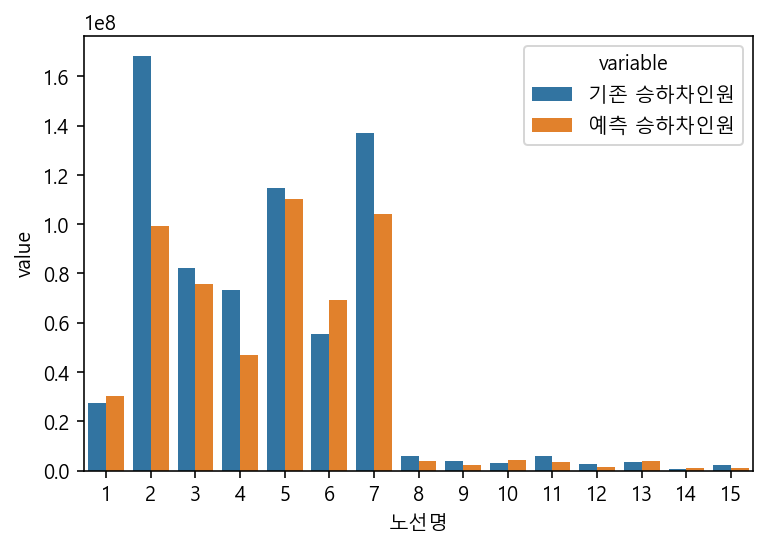

In [26]:
# linear model
get_result(LinearRegression(), "Linear Model")

Ridge Model MAE : 12193.074679


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


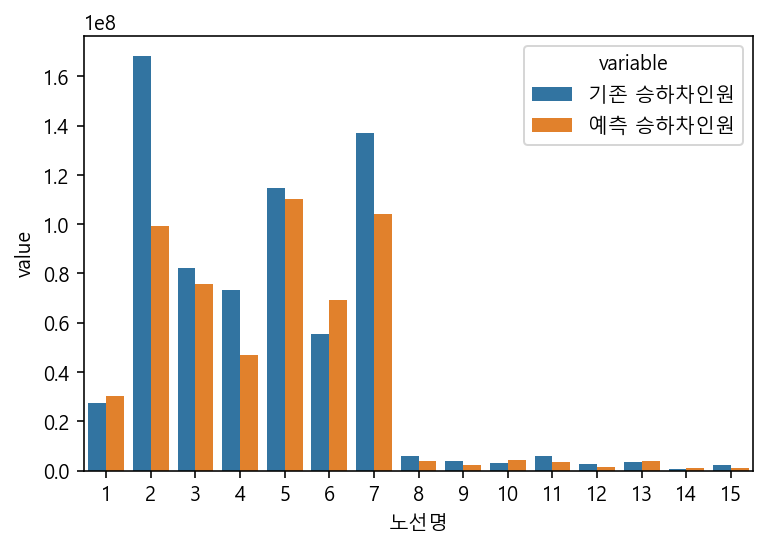

In [27]:
# Ridge Model
get_result(Ridge(), "Ridge Model")

Lasso Model MAE : 13430.903985


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


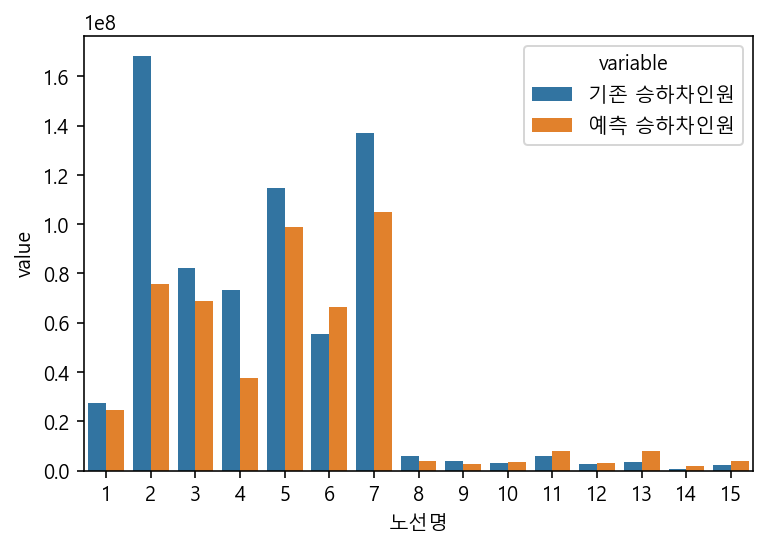

In [28]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# Lasso Model
get_result(Lasso(), "Lasso Model")

[LightGBM] [Warning] Unknown parameter: tree_method
LGBM Model MAE : 2117.470976


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


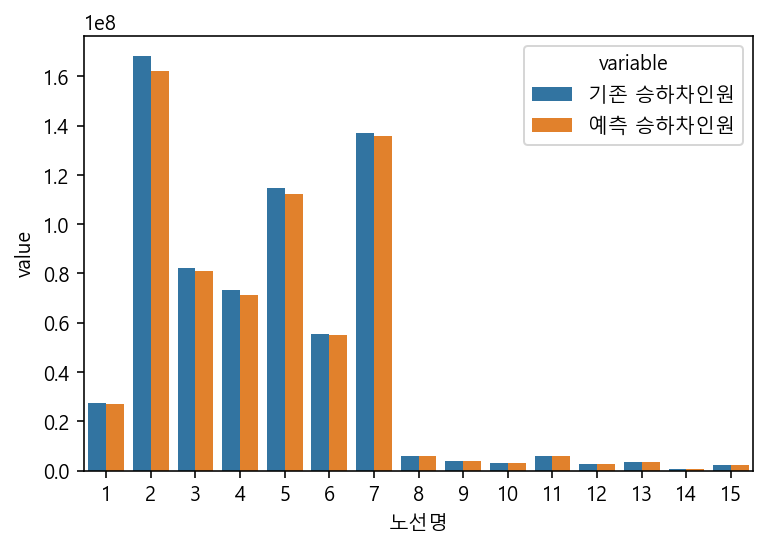

In [29]:
# LGBM Model
get_result(LGBMRegressor(n_jobs=-1, tree_method='gpu_hist'), "LGBM Model")

In [30]:
pred = model.predict(x_test)
print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_test), np.exp(pred))))

NameError: name 'model' is not defined

[LightGBM] [Warning] Unknown parameter: tree_method


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

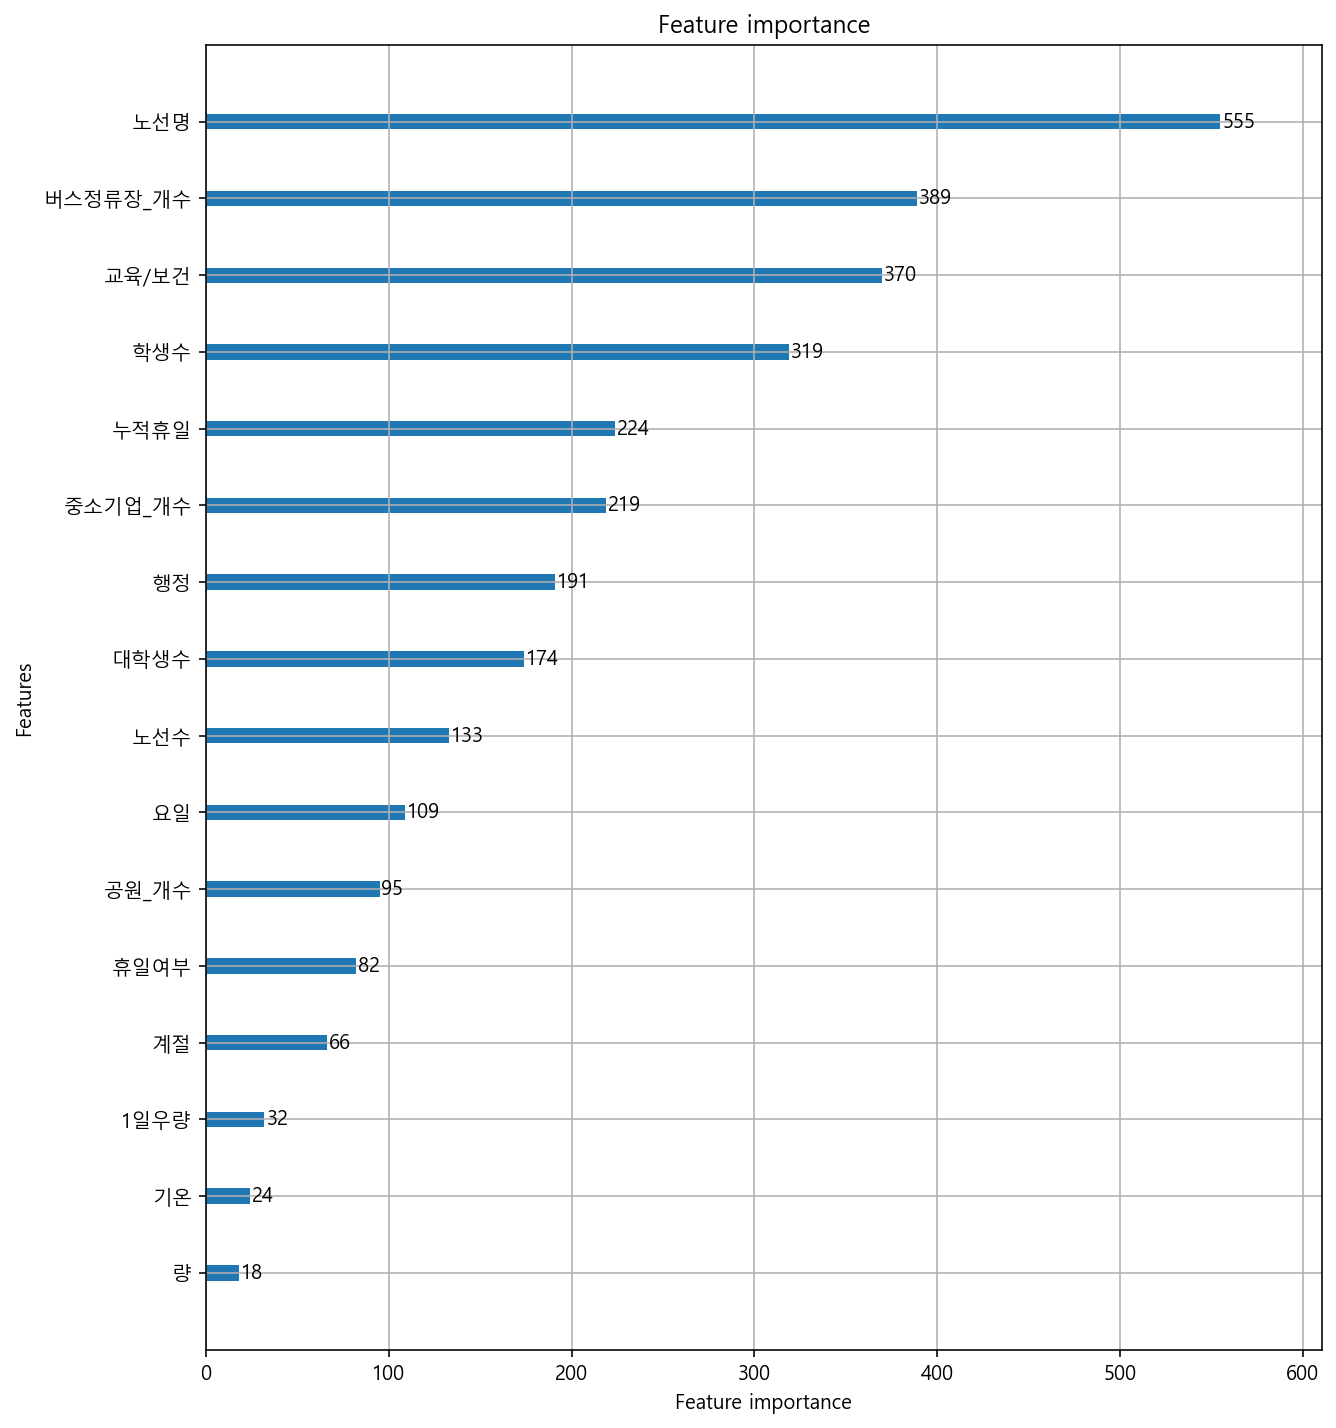

In [31]:
from xgboost import XGBClassifier
from lightgbm import plot_importance
import matplotlib.pyplot as plt

lgbm = LGBMRegressor(n_jobs=-1, tree_method='gpu_hist')

lgbm.fit(x_train, y_train)
pred = lgbm.predict(x_valid)

# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm, ax=ax)

# 하이퍼 파라미터 튜닝

In [32]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate' : [0.001, 0.03, 0.01, 0.05, 0.1, 0.2],
          'max_depth': [3, 5, 7, 10]}

n_splits = 5

kf = KFold(n_splits = n_splits, shuffle=True, random_state=1110)

lgbm_grid = GridSearchCV(LGBMRegressor(tree_method='gpu_hist'), params, n_jobs=-1, scoring='neg_mean_absolute_error', cv=kf)

lgbm_grid.fit(subway_train, label_train)

Grid_cv = pd.DataFrame(lgbm_grid.best_params_, index=[0])

[LightGBM] [Warning] Unknown parameter: tree_method


In [33]:
Grid_cv

,learning_rate,max_depth
0,0.2,10


[LightGBM] [Warning] Unknown parameter: tree_method
LGBM Model MAE : 1525.802674


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


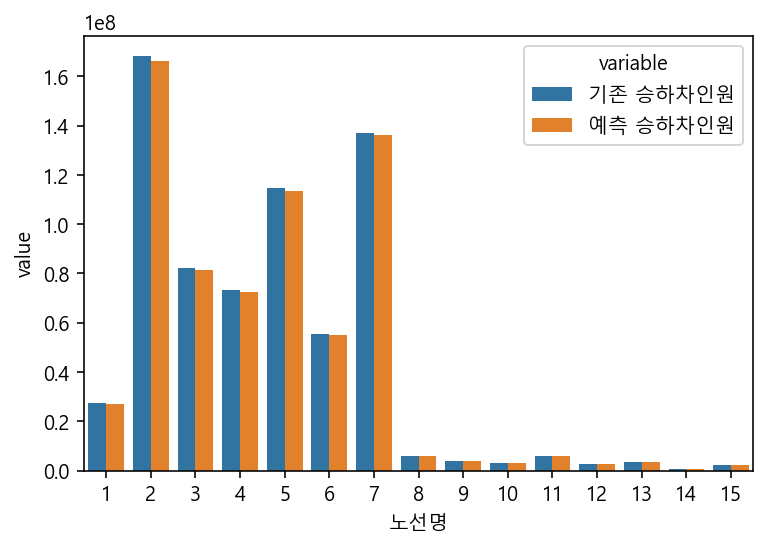

In [35]:
# LGBM Model
get_result(LGBMRegressor(n_jobs=-1,learning_rate = 0.2, max_depth=10, tree_method='gpu_hist'), "LGBM Model")

# 파라미터 튜닝

In [36]:
# 학습 / 검증데이터 분리
x_train, x_test, y_train, y_test = train_test_split(subway_train, label_train, test_size=0.25,
                                                      random_state=1015, shuffle=True)

In [37]:
x_train

,노선명,노선수,학생수,대학생수,요일,휴일여부,버스정류장 개수,교육/보건,행정,중소기업 개수,누적휴일,계절,1일우량,기온,공원 개수,량
26557,2,1,0.0,0.0,1,0,8,42,0,12,0,2,1,0,0,10
27628,2,2,0.0,0.0,1,0,23,46,3,2,0,1,2,0,0,10
17713,7,1,659.0,0.0,6,0,35,43,2,0,0,1,2,0,0,8
57811,5,1,515.0,0.0,1,0,15,44,2,0,0,4,1,0,0,8
42426,3,2,0.0,0.0,2,1,11,30,0,9,1,3,2,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99530,11,2,242.0,0.0,4,0,11,4,0,1,0,3,1,0,1,10
80997,6,2,596.0,27274.0,2,1,27,29,1,1,1,1,1,0,0,8
11772,7,1,0.0,0.0,6,0,25,59,1,0,0,4,1,0,0,8
49847,3,1,0.0,0.0,1,1,11,18,1,0,1,1,1,0,0,10


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.762550
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.379748
[LightGBM] [Debug] init for col-wise cost 0.005188 seconds, init for row-wise cost 0.014370 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

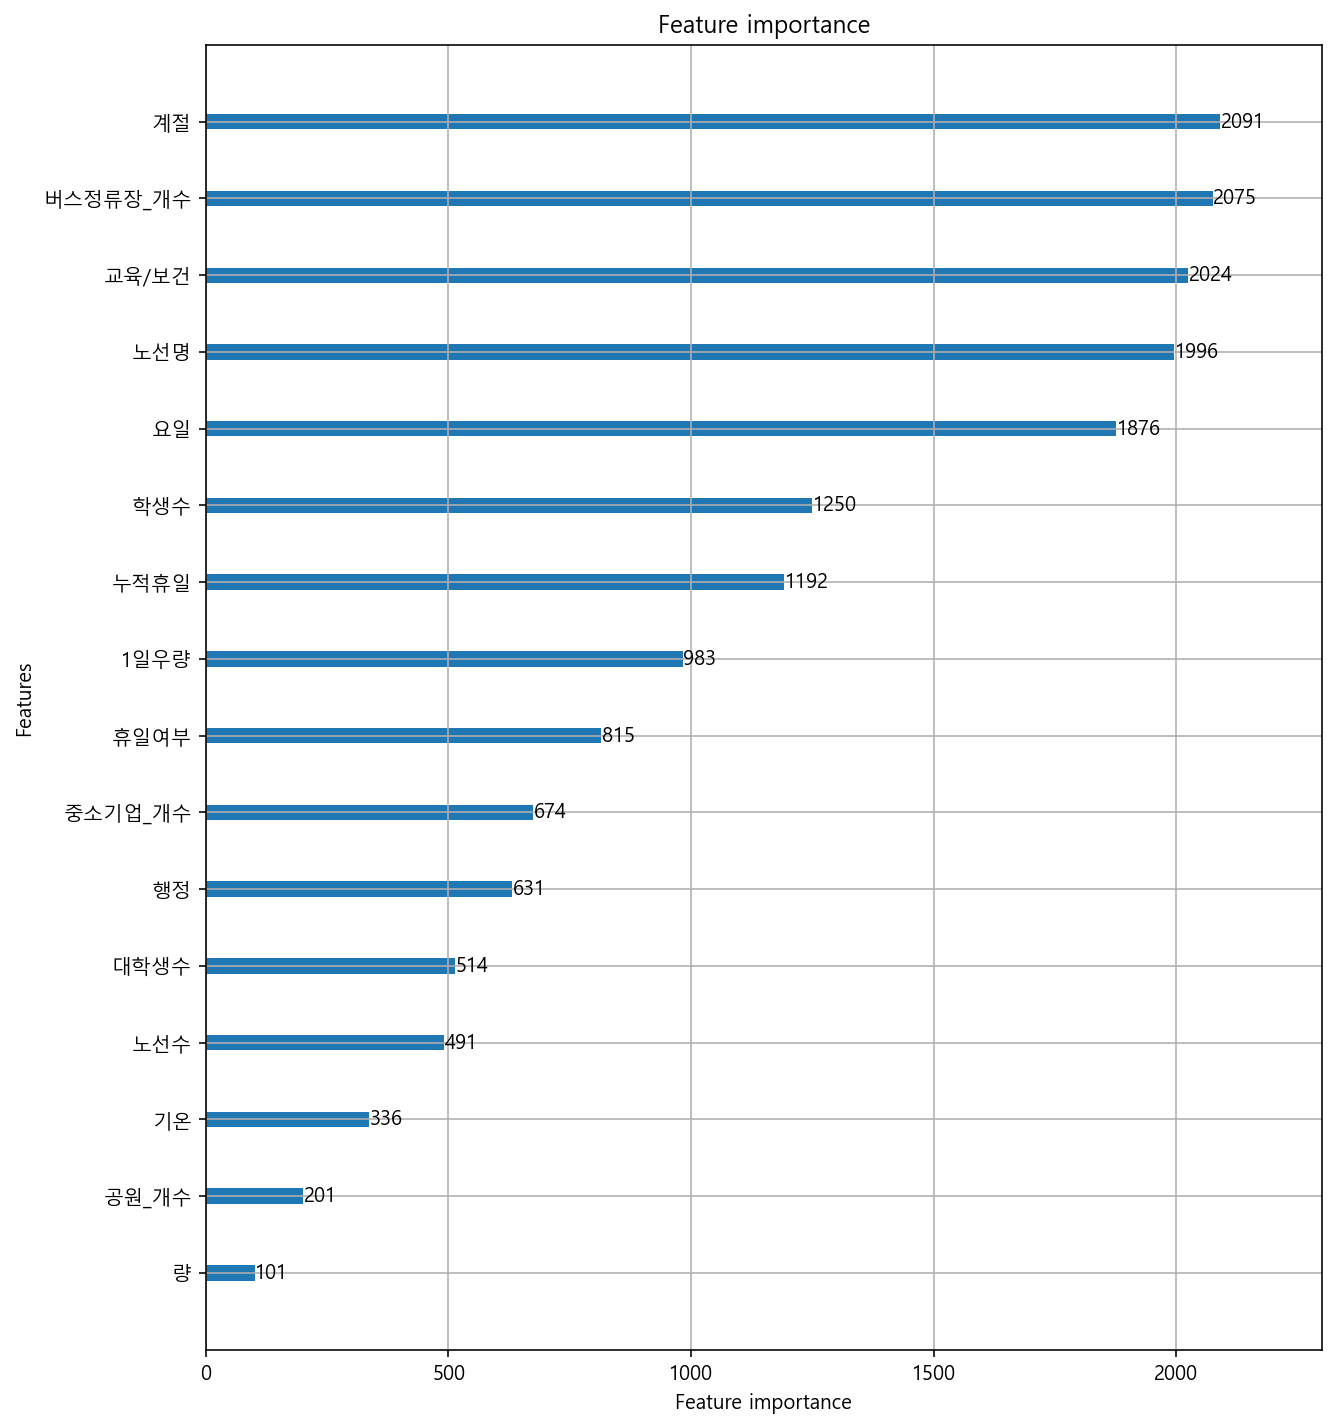

In [44]:
val_scores = []
oof_pred = np.zeros((x_test.shape[0], ))
# oof_pred1 = np.zeros((x_train.shape[0], ))
# oof_pred1 = np.zeros((x_test.shape[0], ))

# df = DataFrame()

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)
    # pred = model.predict(x_valid)

    # df.append(valid)
    oof_pred += model.predict(x_test) / n_splits
    # oof_pred1 += model.predict(x_train) / n_splits
    # val_mae = mean_absolute_error(y_valid, pred)

    # val_scores.append(val_mae)

    # print(f"{i+1} folder validation score : {val_mae:.4f}\n\n")


    
    
# print("final CV : {:.4f}".format(np.mean(val_scores)))
# print("Real Mae : {:.4f}".format(mean_absolute_error(np.exp(y_test), np.exp(oof_pred))))
# print("Real Mse : {:.4f}".format(mean_squared_error(y_test, oof_pred)))
# print("Real Rmse : {:.4f}".format(mean_squared_error(y_test, oof_pred, squared = False)))
# print("Real Msle : {:.4f}".format(mean_squared_log_error(y_test, oof_pred)))
# print("Real Rmsle: {:.4f}".format(mean_squared_log_error(y_test, oof_pred) ** 0.5))



# plot_importance()를 이용해 피처 중요도 시각화
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax)

In [43]:
model

LGBMRegressor(learning_rate=0.2, max_depth=10, n_estimators=20000,
              random_state=10, tree_method='gpu_hist', verbose=1000)

TypeError: 'AxesSubplot' object is not subscriptable

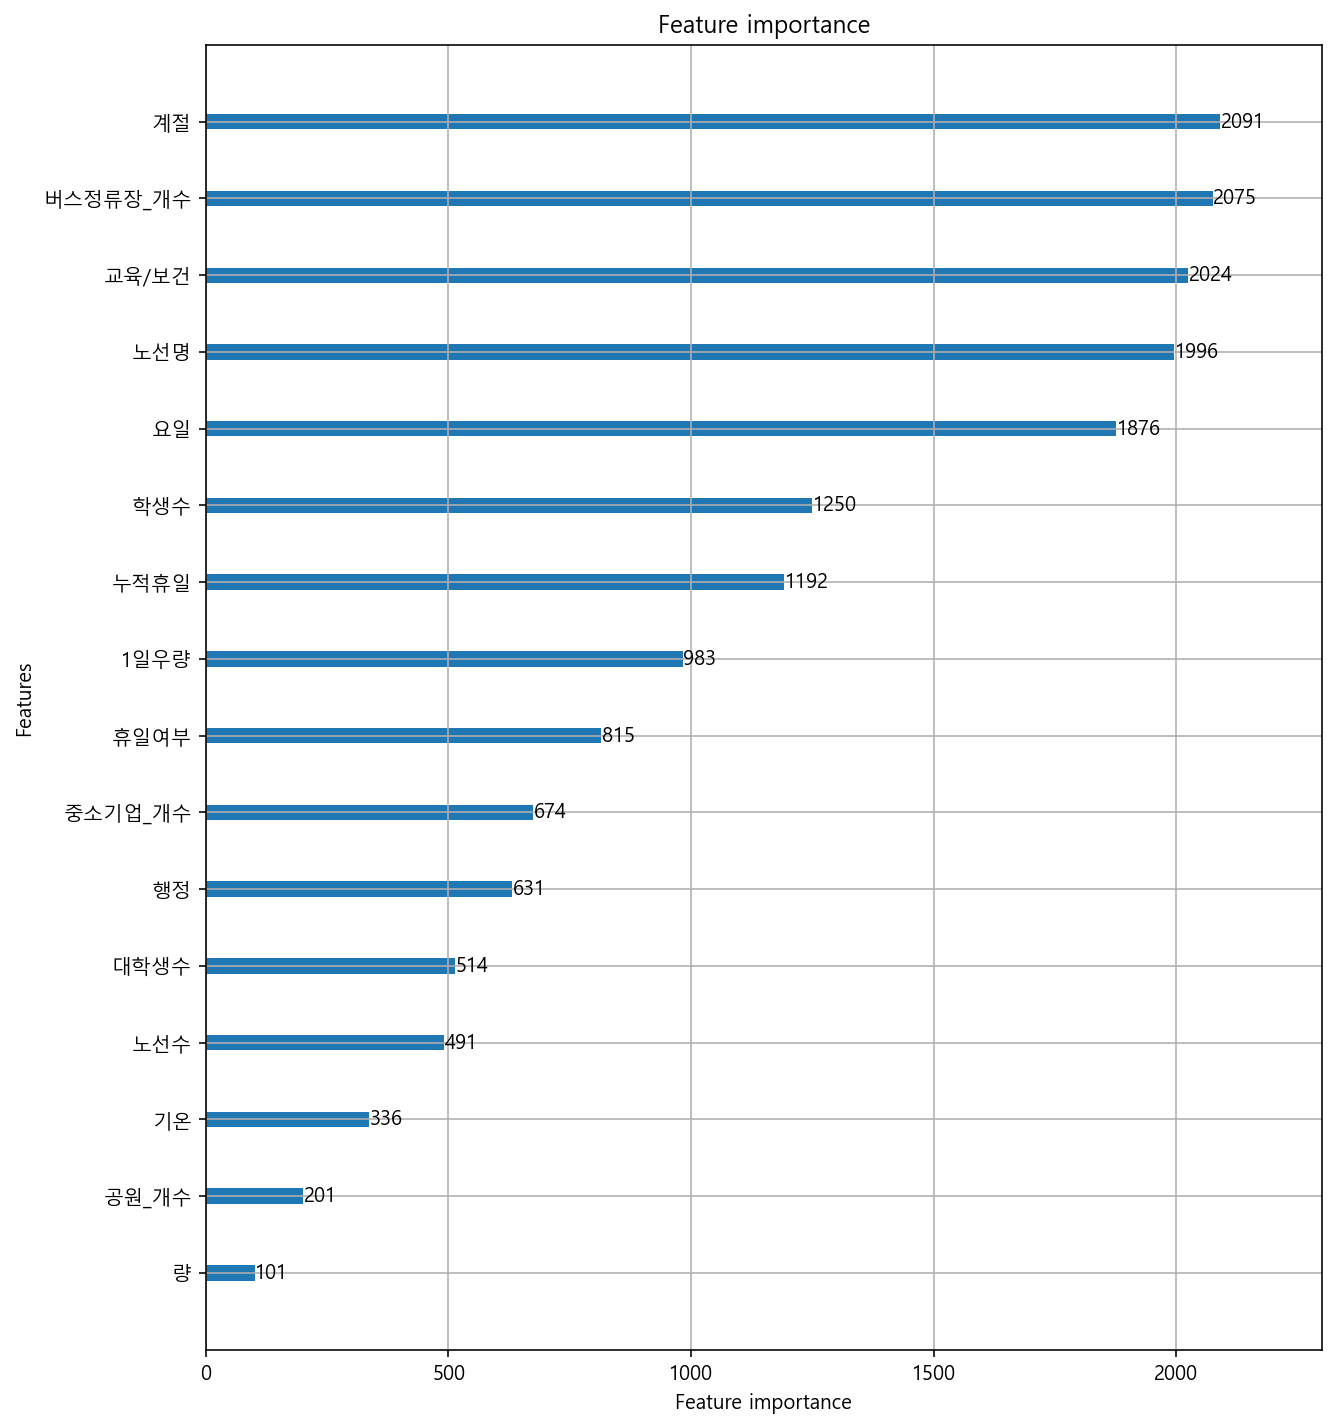

In [50]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax= ax)[:5]

In [45]:
model.predict(x_test)

array([11.01403423,  8.94977645,  9.95355079, ..., 10.95181179,
       10.99243563,  9.90988978])

In [46]:
print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_test), np.exp(oof_pred))))

LGBM Model Mae : 991.1814


In [47]:
pred = model.predict(x_test)
pred1 = model.predict(x_train)

print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_test), np.exp(pred))))
print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_train), np.exp(pred1))))

LGBM Model Mae : 1035.4805
LGBM Model Mae : 1028.7792


In [48]:
print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_test), np.exp(oof_pred))))
# print("LGBM Model Mae : {:.4f}".format(mean_absolute_error(np.exp(y_train), np.exp(oof_pred))))

LGBM Model Mae : 991.1814


In [32]:
a = pd.DataFrame([[1028.78, 991.48]])
a.rename(columns = {0:"Train셋 MAE", 1:"Test셋 MAE"})

,Train셋 MAE,Test셋 MAE
0,1028.78,991.48


In [33]:
pred = model.predict(x_test)

print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(y_test, pred)))
print("Real Mse : {:.4f}".format(mean_squared_error(y_test, pred)))
print("Real Rmse : {:.4f}".format(mean_squared_error(y_test, pred, squared = False)))
print("Real Msle : {:.4f}".format(mean_squared_log_error(y_test, pred)))
print("Real Rmsle: {:.4f}".format(mean_squared_log_error(y_test, pred) ** 0.5))


final CV : nan
Real Mae : 0.0484
Real Mse : 0.0088
Real Rmse : 0.0938
Real Msle : 0.0003
Real Rmsle: 0.0164


C:\Users\jemin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jemin\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
pred1 = model.predict(x_train)

### 과적합 확인

In [41]:
pred1 = model.predict(x_train)

print("final CV : {:.4f}".format(np.mean(val_scores)))
print("Real Mae : {:.4f}".format(mean_absolute_error(y_train, pred1)))
print("Real Mse : {:.4f}".format(mean_squared_error(y_train, pred1)))
print("Real Rmse : {:.4f}".format(mean_squared_error(y_train, pred1, squared = False)))
print("Real Msle : {:.4f}".format(mean_squared_log_error(y_train, pred1)))
print("Real Rmsle: {:.4f}".format(mean_squared_log_error(y_train, pred1) ** 0.5))


final CV : 0.0523
Real Mae : 0.0468
Real Mse : 0.0081
Real Rmse : 0.0902
Real Msle : 0.0002
Real Rmsle: 0.0157


In [42]:
def get_result(model, name):

    model.fit(x_train, y_train)

    pred = model.predict(x_test)

    mae = mean_absolute_error(np.exp(y_test), np.exp(pred))

    print("%s MAE : %f" %(name, mae))

    valid = pd.concat([x_test, y_test], axis=1)
    valid['pred'] = pred

    valid['승차인원_exp'] = np.exp(valid['총승객수_log'])
    valid['pred_exp'] = np.exp(valid['pred'])

    v = valid.pivot_table(index = '노선명' , values= ['승차인원_exp', 'pred_exp'], aggfunc='sum')

    v = v.reset_index()

    v = v.melt(id_vars=['노선명'], value_vars=['승차인원_exp', 'pred_exp'])

    sns.barplot(v['노선명'], v['value'], hue = v['variable'])

[LightGBM] [Warning] Unknown parameter: tree_method
LGBM Model MAE : 1608.318253


C:\Users\jemin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


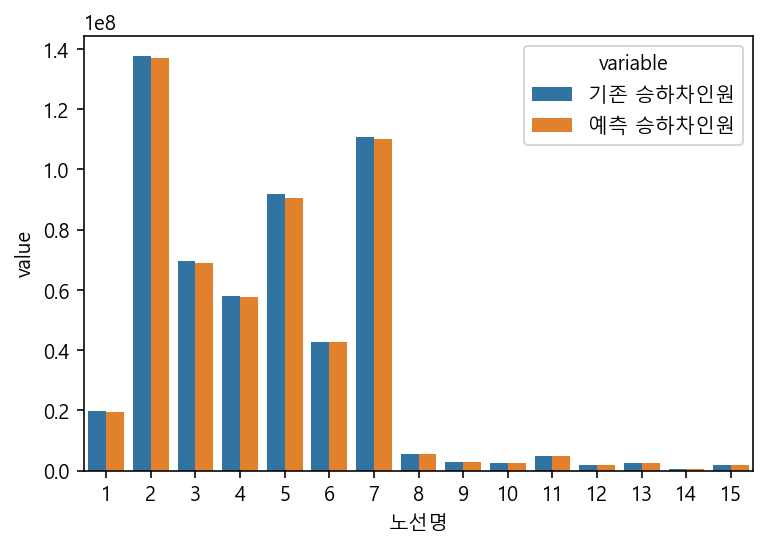

In [49]:
# LGBM Model
get_result(LGBMRegressor(n_jobs=-1,learning_rate = 0.2, max_depth=10, tree_method='gpu_hist'), "LGBM Model")

# 여가까지인듯

# 9호선 예측

In [68]:
feature

,노선명,학생수,대학생수,year,date,휴일여부_x,평균풍속,버스정류장,교육/보건,행정,중소기업 개수,누적휴일,계절,1일우량,최고,최저,기온
0,10,0.0,0.0,2018.0,1,1,1.4,31,14,0,65,1,4,1,0,0,0
1,7,0.0,0.0,2018.0,1,1,1.4,31,14,0,65,1,4,1,0,0,0
2,7,0.0,0.0,2018.0,5,0,1.8,31,14,0,65,0,4,1,0,0,0
3,10,0.0,0.0,2018.0,5,0,1.8,31,14,0,65,0,4,1,0,0,0
4,10,0.0,0.0,2018.0,6,0,2.2,31,14,0,65,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103957,6,2499.0,8637.0,2019.0,0,0,2.1,20,15,1,0,0,4,1,0,0,0
103958,6,2499.0,8637.0,2019.0,2,1,2.0,20,15,1,0,1,4,1,0,0,0
103959,6,2499.0,8637.0,2019.0,3,1,2.9,20,15,1,0,2,4,2,0,0,0
103960,6,2499.0,8637.0,2019.0,1,0,2.9,20,15,1,0,0,4,2,0,0,0


In [107]:
# feature = 업무주거_pre.drop(["총승객수", "총승객수_log", "출입구", "year", "평균풍속", "최고", "최저"], axis = 1)#.drop(['year', '총승객수', '총승객수_log', '출입구', 'day', '평균기온', '평균풍속'], axis = 1)

# target = 업무주거[["총승객수_log"]]

In [108]:
# x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.25)

In [152]:
# feature.columns

Index(['노선명', '노선수', '학생수', '대학생수', 'date', '휴일여부_x', '버스정류장', '교육/보건', '행정',
       '중소기업 개수', '누적휴일', '계절', '1일우량', '기온', '량'],
      dtype='object')

In [35]:
n_9 = pd.read_excel("data/subway_group/9_new.xlsx")

In [36]:
n_9 = n_9.rename(columns = {'노선': '노선명'})
n_9 = n_9.rename(columns = {'버스 정류장 개수': '버스정류장'})
n_9 = n_9.drop('역명', axis = 1)
n_9 = n_9.drop(["위도", "경도"], axis = 1)
n_9 = n_9.drop([ '총집객시설', '레저/관광/예술', '영화관', '백화점', '숙박/음식', '산업'], axis = 1)
n_9 = n_9.iloc[:1].reset_index().drop('index', axis = 1)

In [37]:
n_9['공원 개수'] = 0

In [ ]:
n_9["요일"] = ''
n_9["휴일여부_x"] = ''
# n_9["중소기업"] = ''
n_9["계절"] = ''
n_9["1일우량"] = ''
n_9["기온"] = ''
n_9["누적휴일"] = ''

print()
print()
print()
print()

# for i in range(len(n_9)):
기온 = float(input('기온(0: 정상, 1: 한파or폭염)을 입력하세요: '))
print()
우량 = float(input('1일우량(1:비안옴, 2:약한비, 3:보통비, 4:강한비)을 입력하세요: '))
print()
휴일여부_x = input('휴일여부(N:평일, Y:휴일)를 입력하세요: ')
print()
누적휴일 = int(input('누적휴일을 입력하세요: '))
print()
계절 = float(input('계절(1:봄, 2:여름, 3:가을, 4:겨울)을 입력하세요: '))
print()
# 중소기업 = float(input("중소기업 개수: "))
date = float(input("요일(0:월요일 ~ 6:일요일)을 입력하세요: "))
print()

n_9['기온'] = 기온
n_9['1일우량'] = 우량
n_9['휴일여부_x'] = 휴일여부_x
n_9['누적휴일'] = 누적휴일
n_9['계절'] = 계절
# n_9['중소기업'] = 중소기업
n_9['요일'] = date
    
n_9["노선명"] = 9
n_9["량"] = 6

from sklearn.preprocessing import StandardScaler



기온(0: 정상, 1: 한파or폭염)을 입력하세요:  1


1일우량(1:비안옴, 2:약한비, 3:보통비, 4:강한비)을 입력하세요:  1


휴일여부(N:평일, Y:휴일)를 입력하세요:  N


누적휴일을 입력하세요:  4


계절(1:봄, 2:여름, 3:가을, 4:겨울)을 입력하세요:  4


In [189]:
n_9

,노선명,버스정류장,교육/보건,행정,학생수,대학생수,노선수,우수중소기업,공원 개수,요일,휴일여부_x,계절,1일우량,기온,누적휴일,량
0,9,6,3,0,576,0,1,0,0,6.0,Y,4.0,4.0,1.0,4,6


In [174]:
# n_9['date']=n_9['date'].astype('int')

In [39]:
# object형 int로 변환하기

from sklearn.preprocessing import LabelEncoder

cat_columns = [c for c, t in zip(n_9.dtypes.index, n_9.dtypes) if t == 'O']

le = LabelEncoder()

for col in cat_columns:
  n_9.loc[:, col] = le.fit_transform(n_9[col])

In [109]:
model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
model.fit(x_train, y_train)#, early_stopping_rounds=500)#,  eval_metric = 'mae', early_stopping_rounds=500, verbose=500)
# pred = model.predict(y_test)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.762961
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.379993
[LightGBM] [Debug] init for col-wise cost 0.004744 seconds, init for row-wise cost 0.005807 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total 

LGBMRegressor(learning_rate=0.2, max_depth=10, n_estimators=20000,
              random_state=10, tree_method='gpu_hist', verbose=1000)

In [40]:
pred = model.predict(x_test)

In [41]:
pred1 = model.predict(n_9)

In [178]:
n_9=n_9.drop('승하차수', axis= 1)

In [42]:
pred1

array([10.73174254])

In [43]:
n_9['승하차수'] = np.exp(pred1)

In [44]:
n_9

,노선명,버스정류장,교육/보건,행정,학생수,대학생수,노선수,우수중소기업,공원 개수,요일,휴일여부_x,계절,1일우량,기온,누적휴일,량,승하차수
0,9,6,3,0,576,0,1,0,0,6.0,0,4.0,3.0,0.0,3,6,45786.407043


In [173]:
# n_9 = n_9.drop('승하차수', axis = 1)

In [180]:
# model.fit(x_train, y_train)

# pred = model.predict(x_test)

mae = mean_absolute_error(np.exp(y_test[:4]), np.exp(pred1))

print("%s MAE : %f" %(LGBMRegressor, mae))

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

rmse = mean_squared_error(np.exp(y_test[:4]), np.exp(pred1),squared=False)
mse = mean_squared_error(np.exp(y_test[:4]), np.exp(pred1))
msle = mean_squared_log_error(np.exp(y_test[:4]), np.exp(pred1))

print('mse',mse,'rmse',rmse)
print('rmse',mse**0.5)
print('msle',msle)
print('rmsle',msle**0.5)

<class 'lightgbm.sklearn.LGBMRegressor'> MAE : 21217.519866
mse 670268529.4400119 rmse 25889.54479012738
rmse 25889.54479012738
msle 14.779729994252888
rmsle 3.8444414411267713


In [152]:
n_9

,노선명,버스정류장,교육/보건,산업,레저/관광/예술,숙박/음식,행정,영화관,백화점,학생수,대학생수,노선수,일강수량,최고기온,휴일여부_x,최대풍속,date,month,누적휴일,승하차수
0,9,6,3,1,2,0,0,0,0,576,0,1,-0.795587,0.270229,1,0.666109,0,1.0,1,142.415750
1,9,28,22,4,1,1,0,0,0,3172,0,1,-0.795587,0.319361,0,-0.715450,0,1.0,0,145.286082
2,9,22,14,6,1,1,0,0,1,0,0,2,-0.061199,1.056348,0,-1.208864,0,1.0,0,156.595953
3,9,9,17,2,0,0,1,0,0,1854,0,1,1.652373,-1.645938,0,1.258205,0,1.0,0,112.718151


In [88]:
val_scores = []
oof_pred = np.zeros((1, ))

for i, (trn_idx, val_idx) in enumerate(kf.split(subway_train, label_train)):
    x_train, x_valid = subway_train.iloc[trn_idx], subway_train.iloc[val_idx]
    y_train, y_valid = label_train.iloc[trn_idx], label_train[val_idx]

    model = LGBMRegressor(n_estimators = 20000, learning_rate = 0.2, max_depth = 10, verbose = 1000, tree_method = 'gpu_hist', random_state=10)
    evals = [(x_train, y_train), (x_valid, y_valid)]

    model.fit(x_train, y_train, eval_metric = 'mae', eval_set = evals, early_stopping_rounds=500, verbose=500)
    pred = model.predict(x_valid)

    # oof_pred += model.predict(accurate_feature) / n_splits
    val_mae = mean_absolute_error(y_valid, pred)

    val_scores.append(val_mae)

C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.722567
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.285209
[LightGBM] [Debug] init for col-wise cost 0.001732 seconds, init for row-wise cost 0.010532 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 27084, number

C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.723025
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.285347
[LightGBM] [Debug] init for col-wise cost 0.002560 seconds, init for row-wise cost 0.006288 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 27085, number

C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.721897
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.285087
[LightGBM] [Debug] init for col-wise cost 0.002003 seconds, init for row-wise cost 0.005103 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 27085, number

C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.722002
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.285091
[LightGBM] [Debug] init for col-wise cost 0.001722 seconds, init for row-wise cost 0.006027 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 27085, number

C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\jemin\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.721854
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.285010
[LightGBM] [Debug] init for col-wise cost 0.001846 seconds, init for row-wise cost 0.006974 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 27085, number